# Checking asymptotic normality of the MLE for Poisson regression

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

/home/seb/py36/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
n_simul = 1000
n_obs = 10000

l = [0.01, 0.1, 1, 5, 10, 100]

THETA_HAT = np.zeros((n_simul, 6))

for i in range(n_simul):
    for j, lj in enumerate(l):
        y = np.random.poisson(lj, n_obs)
        
        THETA_HAT[i,j] = sm.GLM(endog = y,
                                exog = np.ones(n_obs).reshape(-1,1),
                                family = sm.families.Poisson()).fit().params[0]
        
    if (i+1) % 100 == 0:
        print('{} simulations completed'.format(i+1))

100 simulations completed
200 simulations completed
300 simulations completed
400 simulations completed
500 simulations completed
600 simulations completed
700 simulations completed
800 simulations completed
900 simulations completed
1000 simulations completed


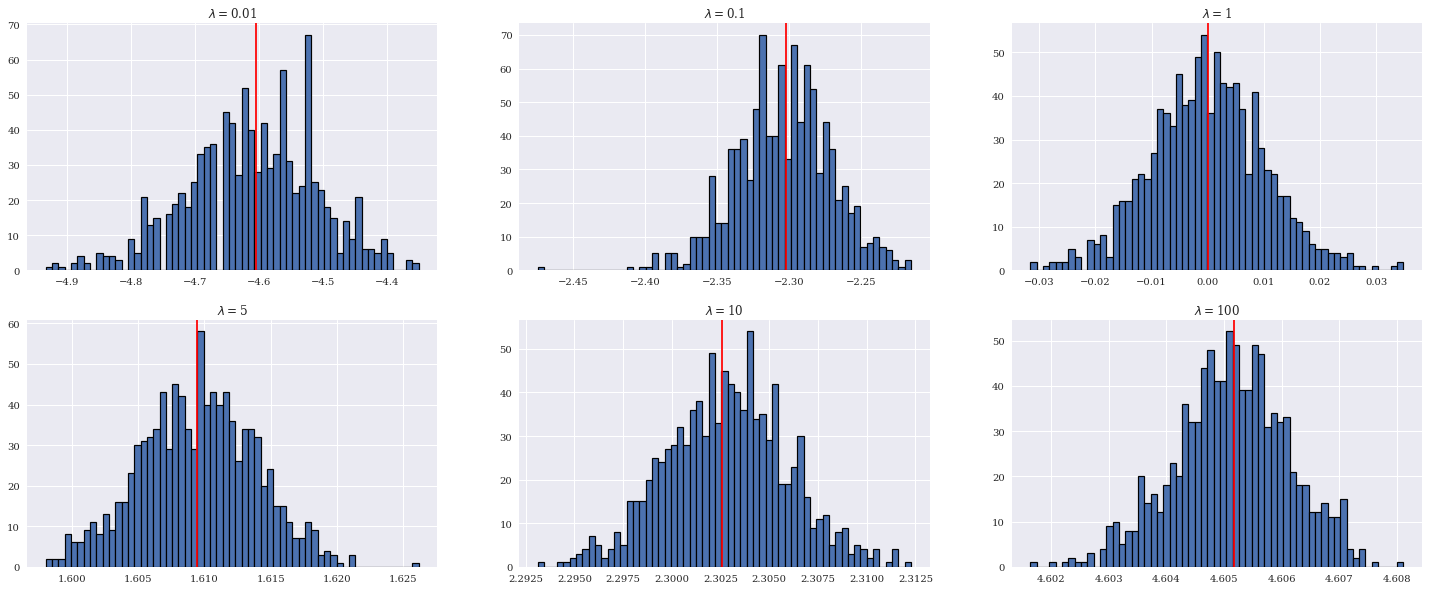

In [3]:
f, ax = plt.subplots(2, 3, figsize=(25, 10))

row = 0
col = 0
for j, lj in enumerate(l):
    
    ax[row,col].hist(THETA_HAT[:,j], bins=59, edgecolor='black', linewidth=1.2)
    ax[row,col].axvline(np.log(l[j]), color='r')
    ax[row,col].set_title('$\lambda=${}'.format(l[j]))
    
    if col==2:
        col=0
        row+=1
    else:
        col+=1